In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Set plotting style and figure size
plt.style.use('seaborn-v0_8-darkgrid')  # or try 'seaborn-v0_8'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme()  # This is the newer way to set seaborn's default theme

In [4]:
# Read the data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')

In [5]:
# Basic data exploration
def explore_data(df):
    """
    Perform initial exploratory data analysis
    """
    # Basic information
    print("=== Dataset Overview ===")
    print(f"Shape: {df.shape}")
    print("\n=== Data Types ===")
    print(df.dtypes)
    
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Summary statistics
    print("\n=== Summary Statistics ===")
    print(df.describe())
    
    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    # Display sample of data
    print("\n=== First Few Rows ===")
    print(df.head())
    
    return df

In [6]:
explore_data(df)

=== Dataset Overview ===
Shape: (24336, 5)

=== Data Types ===
Unnamed: 0             int64
date                  object
crime_rate           float64
state                 object
crime_rate_filled    float64
dtype: object

=== Summary Statistics ===
         Unnamed: 0                           date    crime_rate  \
count  24336.000000                          24336  24336.000000   
mean   12422.500000  2004-06-16 01:50:46.153846272    292.417118   
min        0.000000            1985-01-01 00:00:00      0.000000   
25%     6211.250000            1994-09-23 12:00:00    195.782500   
50%    12422.500000            2004-06-16 00:00:00    268.815000   
75%    18633.750000            2014-03-08 18:00:00    366.740000   
max    24845.000000            2023-12-01 00:00:00   5914.990000   
std     7175.401631                            NaN    194.674572   

       crime_rate_filled  
count       24336.000000  
mean          292.447145  
min             0.000000  
25%           195.937500  
50

,Unnamed: 0,date,crime_rate,state,crime_rate_filled
0,0,1985-01-01,296.58,Alabama,296.58
1,1,1985-02-01,261.86,Alabama,261.86
2,2,1985-03-01,288.37,Alabama,288.37
3,3,1985-04-01,265.32,Alabama,265.32
4,4,1985-05-01,281.24,Alabama,281.24
...,...,...,...,...,...
24331,8589,2023-08-01,137.89,Kentucky,137.89
24332,8590,2023-09-01,127.35,Kentucky,127.35
24333,8591,2023-10-01,132.57,Kentucky,132.57
24334,8592,2023-11-01,120.65,Kentucky,120.65


In [7]:
# Basic statistics by state
def state_statistics(df):
    """
    Calculate key statistics for each state
    """
    stats = df.groupby('state').agg({
        'crime_rate': ['count', 'mean', 'std', 'min', 'max']
    }).round(2)
    
    print("=== State-wise Statistics ===")
    return stats

In [8]:
# Time-based analysis
def analyze_time_patterns(df):
    """
    Analyze temporal patterns in the data
    """
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Yearly trends
    yearly_avg = df.groupby('year')['crime_rate'].mean()
    
    plt.figure(figsize=(15, 6))
    yearly_avg.plot()
    plt.title('Average Crime Rate Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Crime Rate')
    plt.grid(True)
    plt.show()
    
    # Monthly patterns
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x='month', y='crime_rate')
    plt.title('Crime Rate Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Crime Rate')
    plt.show()
    
    return df

=== State-wise Statistics ===


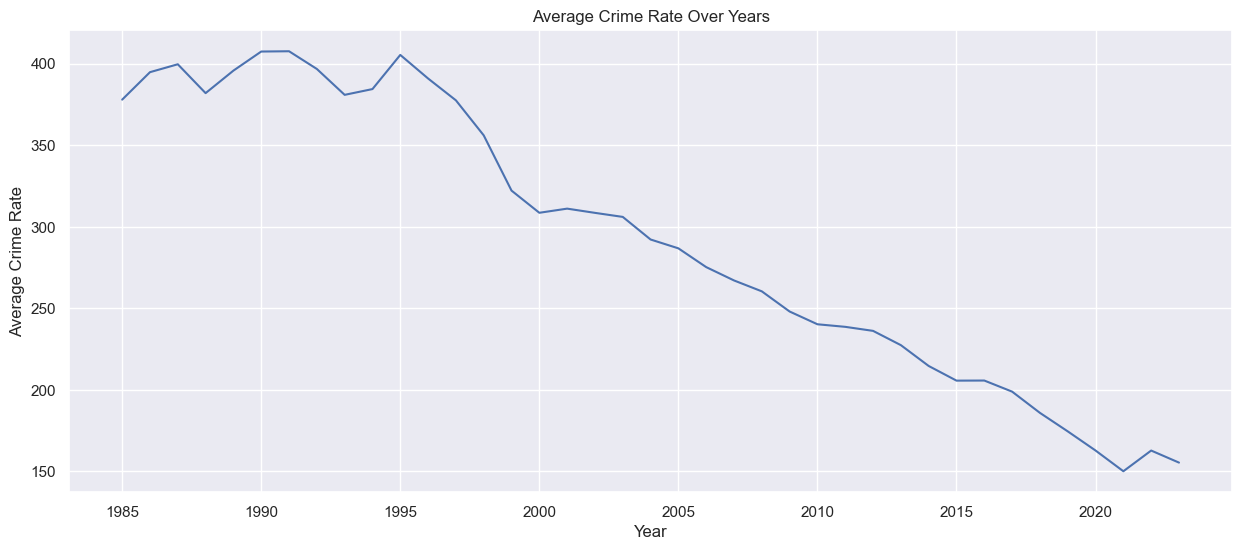

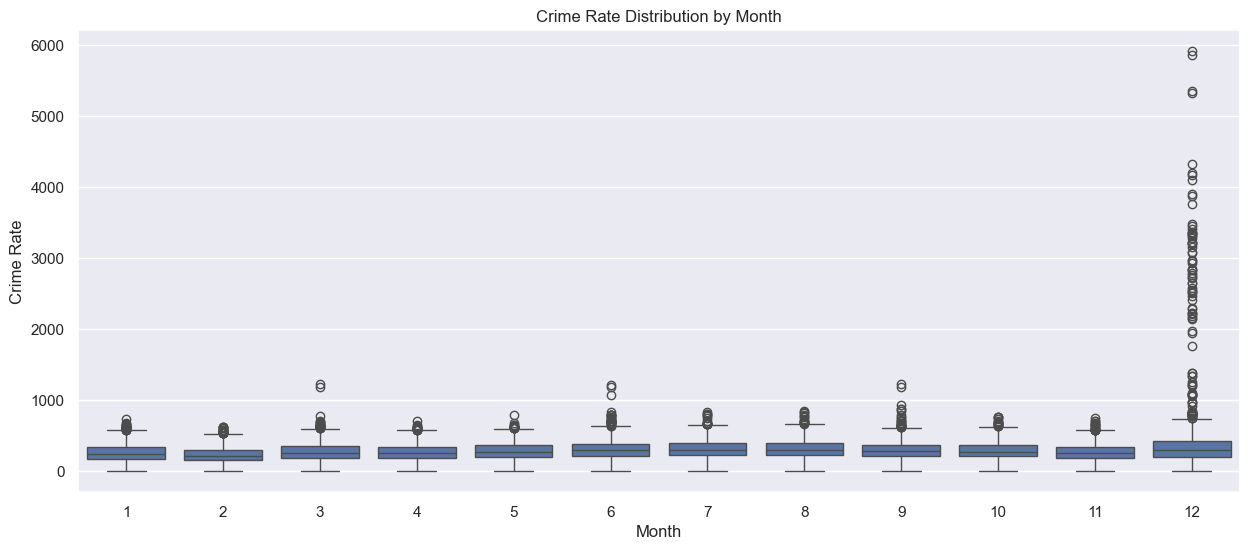

In [10]:
stats = state_statistics(df)
df = analyze_time_patterns(df)

C:\Users\marka\AppData\Local\Temp\ipykernel_15888\2904720730.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


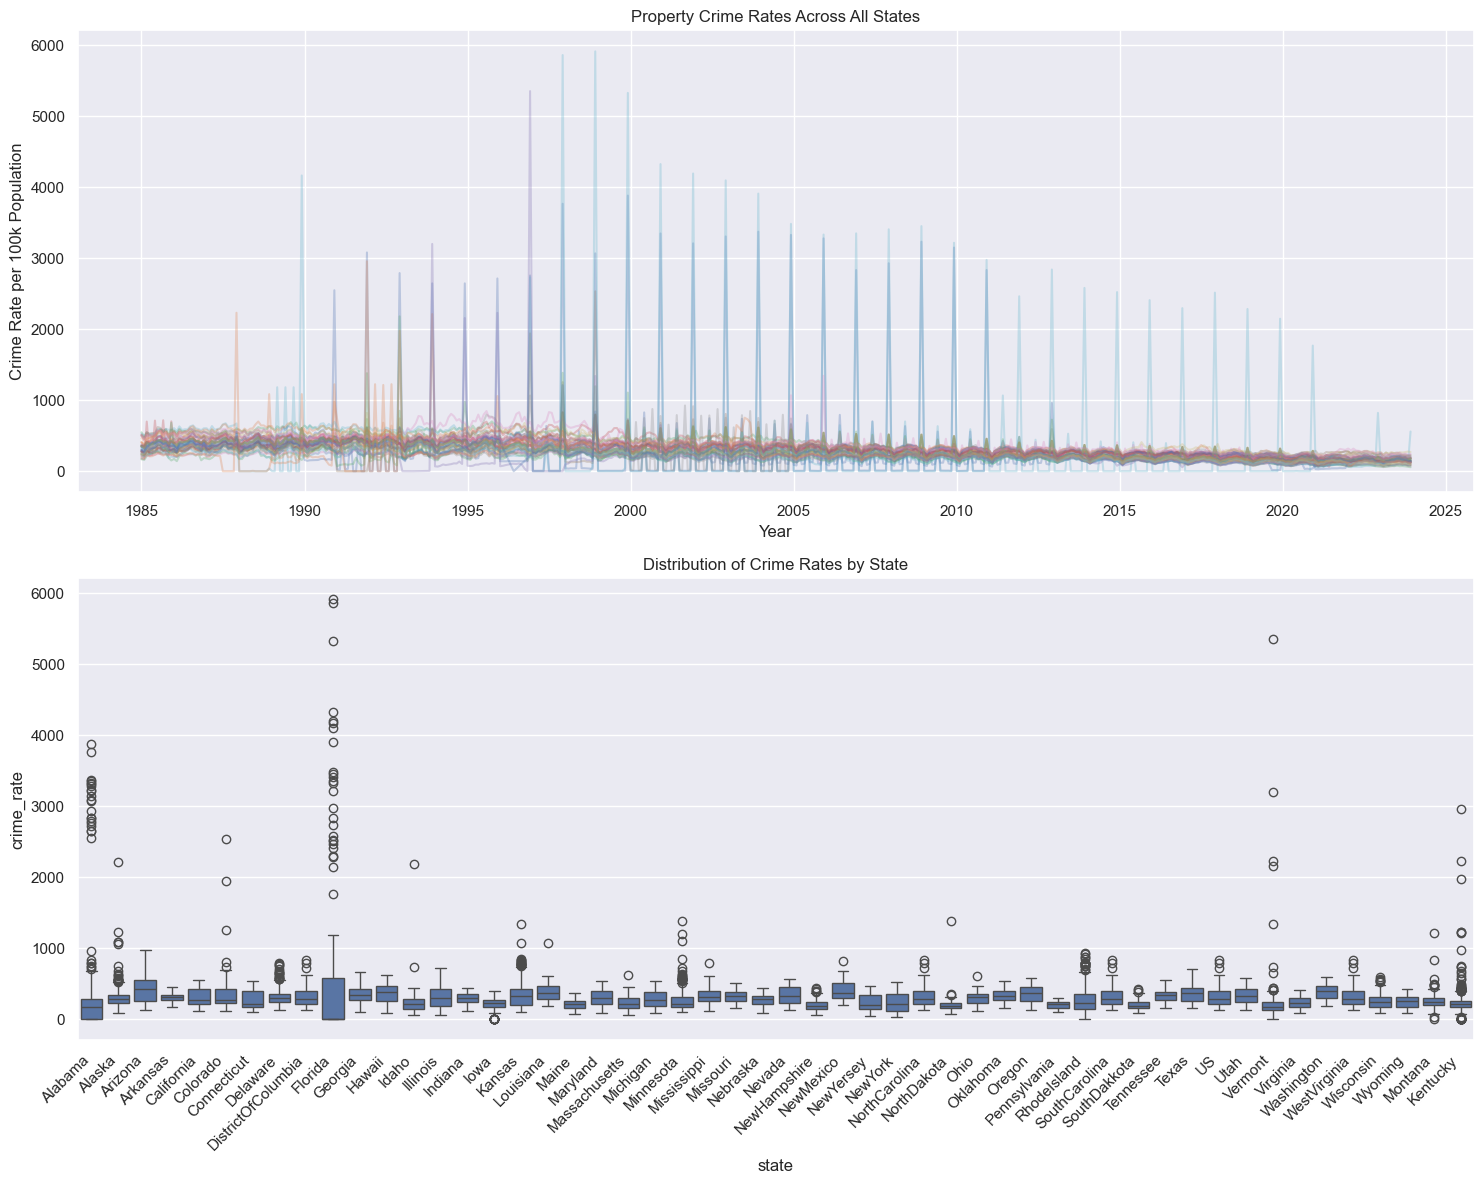

In [11]:
# Initial time series plots
def plot_initial_timeseries(df):
    """
    Create initial time series visualizations
    """
    # Create figure and axis objects with subplots()
    fig, axes = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Overall trend for all states
    for state in df['state'].unique():
        state_data = df[df['state'] == state]
        axes[0].plot(state_data['date'], state_data['crime_rate'], alpha=0.3)
    
    axes[0].set_title('Property Crime Rates Across All States')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Crime Rate per 100k Population')
    axes[0].grid(True)
    
    # Plot 2: Box plot of crime rates by state
    sns.boxplot(data=df, x='state', y='crime_rate', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].set_title('Distribution of Crime Rates by State')
    
    plt.tight_layout()
    plt.show()

plot_initial_timeseries(df)


=== Dataset Overview ===
Total records for selected states: 936

Records per state:
state
California    468
Ohio          468
Name: count, dtype: int64

=== State Statistics ===
           crime_rate                                
                count    mean     std     min     max
state                                                
California        468  306.36  110.30  114.27  552.10
Ohio              468  295.00   82.13  119.93  610.53

=== Average Yearly Change ===
state
California   -1.98
Ohio         -2.02
Name: pct_change, dtype: float64


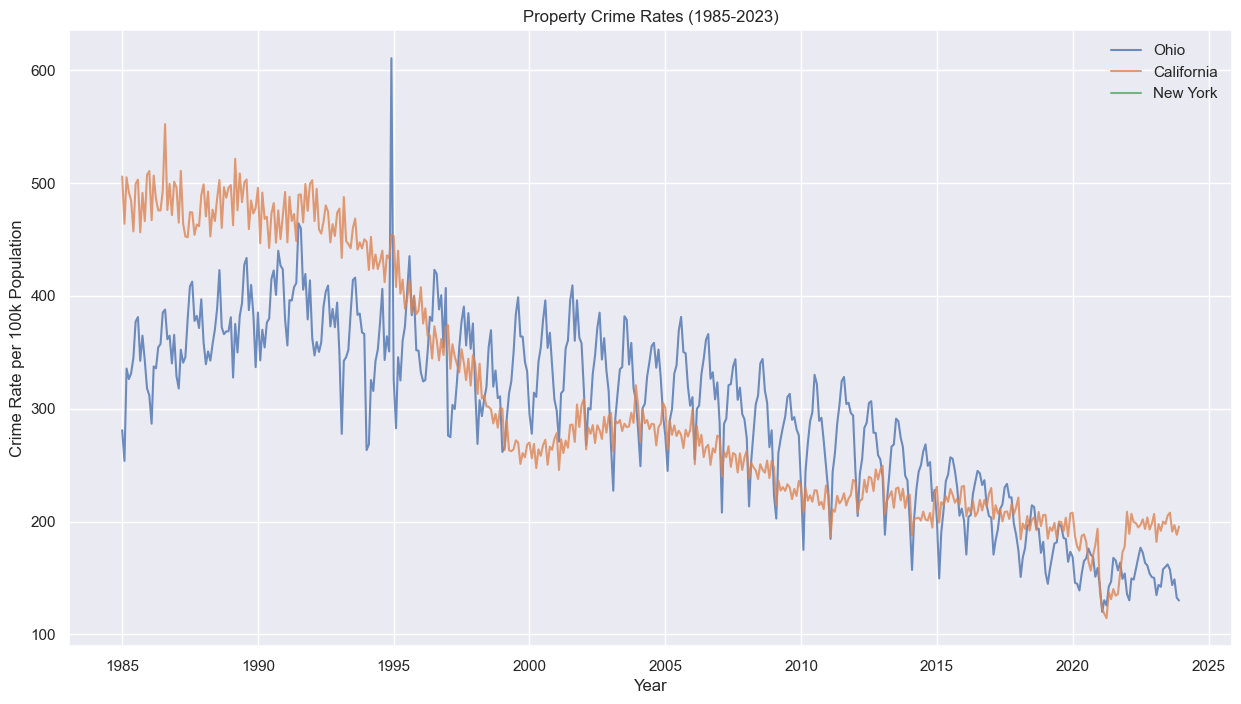

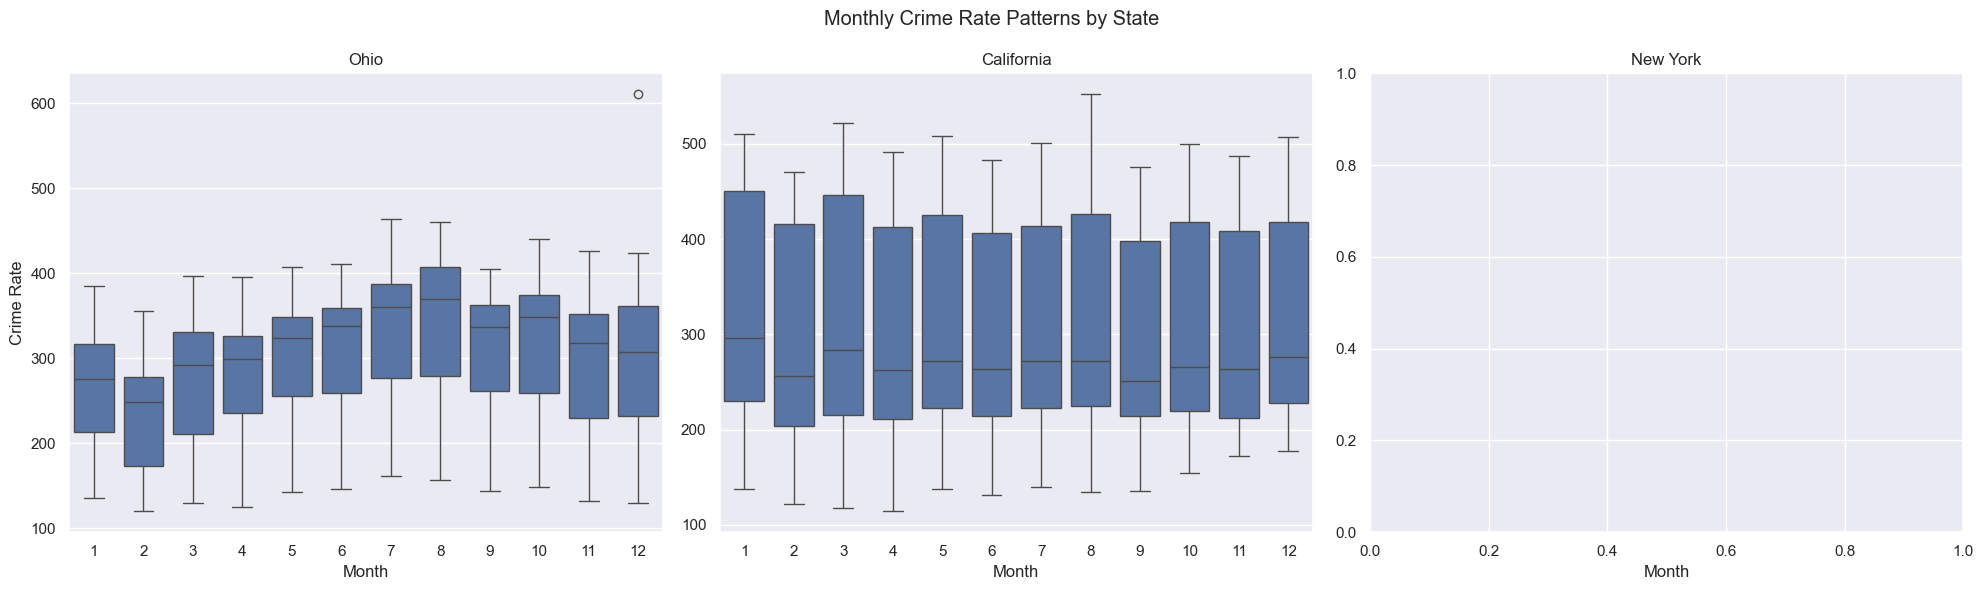

C:\Users\marka\AppData\Local\Temp\ipykernel_15888\3727936564.py:82: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=state_data, x='crime_rate', label=state)


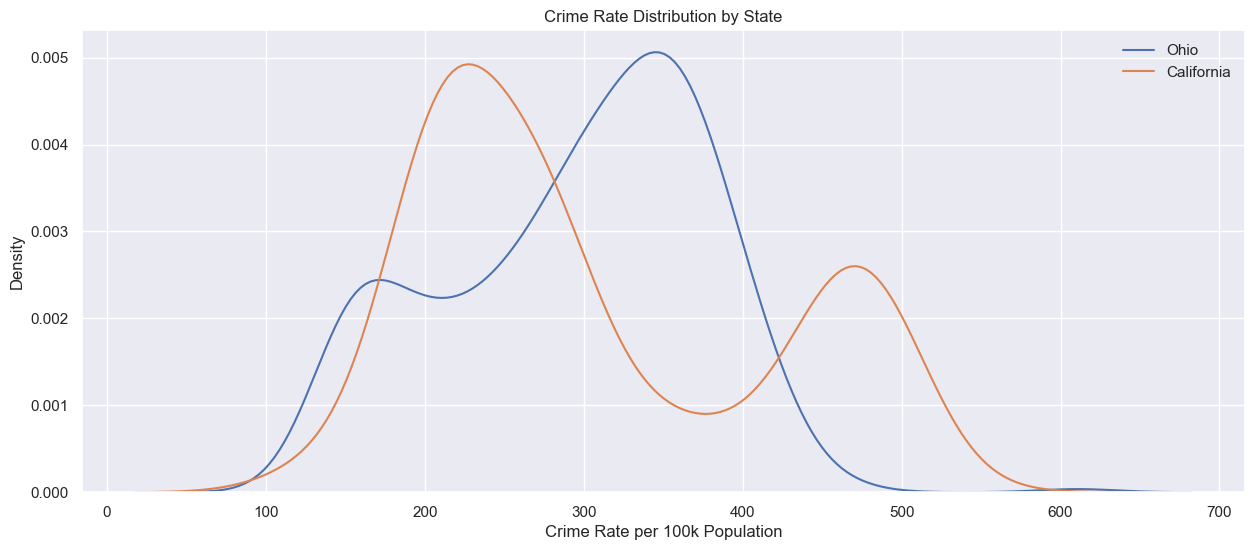

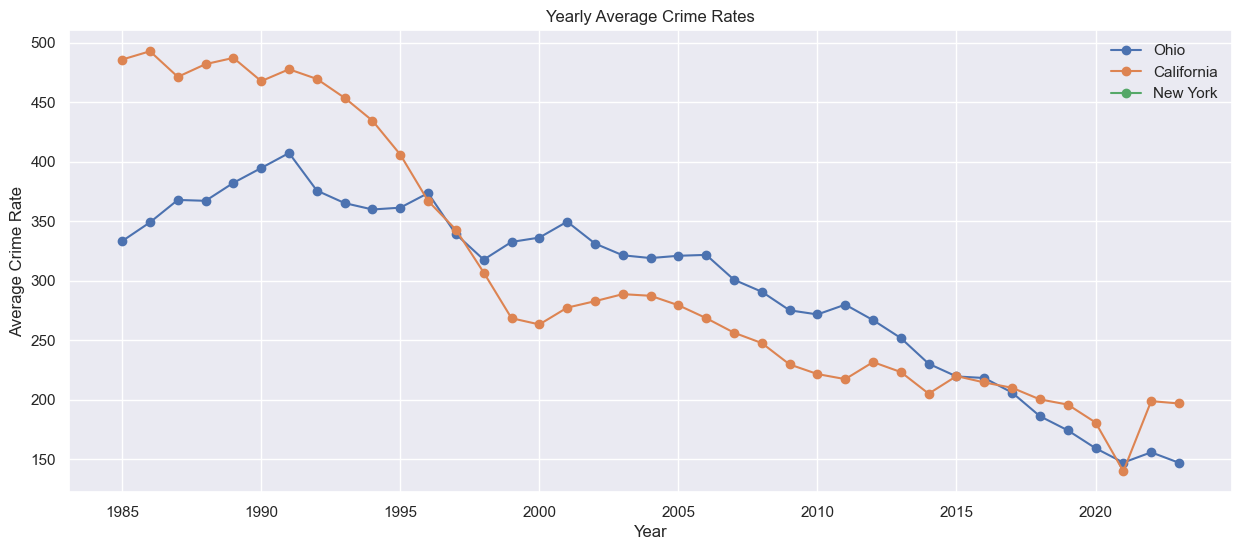


Filtered dataset saved as 'three_states_crime_data.csv'


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import and prepare data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter for our three states of interest
states_of_interest = ['Ohio', 'California', 'New York']
df_filtered = df[df['state'].isin(states_of_interest)].copy()

# Basic statistics for each state
def show_state_statistics():
    """
    Display key statistics for each state
    """
    stats = df_filtered.groupby('state').agg({
        'crime_rate': ['count', 'mean', 'std', 'min', 'max']
    }).round(2)
    
    print("\n=== State Statistics ===")
    print(stats)
    
    # Calculate year-over-year changes
    df_filtered['year'] = df_filtered['date'].dt.year
    yearly_avg = df_filtered.groupby(['state', 'year'])['crime_rate'].mean().reset_index()
    yearly_avg['pct_change'] = yearly_avg.groupby('state')['crime_rate'].pct_change() * 100
    
    print("\n=== Average Yearly Change ===")
    print(yearly_avg.groupby('state')['pct_change'].mean().round(2))

# Time series visualization
def plot_state_trends():
    """
    Create time series plots for the three states
    """
    plt.figure(figsize=(15, 8))
    
    for state in states_of_interest:
        state_data = df_filtered[df_filtered['state'] == state]
        plt.plot(state_data['date'], state_data['crime_rate'], label=state, alpha=0.8)
    
    plt.title('Property Crime Rates (1985-2023)')
    plt.xlabel('Year')
    plt.ylabel('Crime Rate per 100k Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Seasonal patterns
def analyze_seasonality():
    """
    Analyze seasonal patterns for each state
    """
    df_filtered['month'] = df_filtered['date'].dt.month
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Monthly Crime Rate Patterns by State')
    
    for idx, state in enumerate(states_of_interest):
        state_data = df_filtered[df_filtered['state'] == state]
        sns.boxplot(data=state_data, x='month', y='crime_rate', ax=axes[idx])
        axes[idx].set_title(state)
        axes[idx].set_xlabel('Month')
        axes[idx].set_ylabel('Crime Rate' if idx == 0 else '')
        
    plt.tight_layout()
    plt.show()

# Distribution comparison
def compare_distributions():
    """
    Compare crime rate distributions across states
    """
    plt.figure(figsize=(15, 6))
    
    for state in states_of_interest:
        state_data = df_filtered[df_filtered['state'] == state]
        sns.kdeplot(data=state_data, x='crime_rate', label=state)
    
    plt.title('Crime Rate Distribution by State')
    plt.xlabel('Crime Rate per 100k Population')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Trend analysis
def analyze_trends():
    """
    Analyze long-term trends and create year-over-year comparisons
    """
    # Calculate yearly averages
    df_filtered['year'] = df_filtered['date'].dt.year
    yearly_avg = df_filtered.groupby(['state', 'year'])['crime_rate'].mean().reset_index()
    
    # Plot yearly trends
    plt.figure(figsize=(15, 6))
    
    for state in states_of_interest:
        state_data = yearly_avg[yearly_avg['state'] == state]
        plt.plot(state_data['year'], state_data['crime_rate'], marker='o', label=state)
    
    plt.title('Yearly Average Crime Rates')
    plt.xlabel('Year')
    plt.ylabel('Average Crime Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run all analyses
print("=== Dataset Overview ===")
print(f"Total records for selected states: {len(df_filtered)}")
print("\nRecords per state:")
print(df_filtered['state'].value_counts())

show_state_statistics()
plot_state_trends()
analyze_seasonality()
compare_distributions()
analyze_trends()

# Save filtered dataset
df_filtered.to_csv('three_states_crime_data.csv', index=False)
print("\nFiltered dataset saved as 'three_states_crime_data.csv'")

In [13]:
# Let's check all unique state names in the dataset
print("Unique state names in dataset:")
print(df['state'].unique())

# Let's also check if there are any variations in case or spacing
print("\nState names containing 'new' or 'york' (case insensitive):")
print(df[df['state'].str.lower().str.contains('new|york', na=False)]['state'].unique())

Unique state names in dataset:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'DistrictOfColumbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Nebraska' 'Nevada' 'NewHampshire' 'NewMexico' 'NewYersey'
 'NewYork' 'NorthCarolina' 'NorthDakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'RhodeIsland' 'SouthCarolina' 'SouthDakkota' 'Tennessee'
 'Texas' 'US' 'Utah' 'Vermont' 'Virginia' 'Washington' 'WestVirginia'
 'Wisconsin' 'Wyoming' 'Montana' 'Kentucky']

State names containing 'new' or 'york' (case insensitive):
['NewHampshire' 'NewMexico' 'NewYersey' 'NewYork']


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import and prepare data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter for our three states with correct naming
states_of_interest = ['Ohio', 'California', 'NewYork']  # Updated NewYork
df_filtered = df[df['state'].isin(states_of_interest)].copy()

# Verify we have data for all three states
print("Number of records per state:")
print(df_filtered['state'].value_counts())

# Let's also check the date range for each state
print("\nDate range for each state:")
for state in states_of_interest:
    state_data = df_filtered[df_filtered['state'] == state]
    print(f"\n{state}:")
    print(f"Start date: {state_data['date'].min()}")
    print(f"End date: {state_data['date'].max()}")
    print(f"Number of records: {len(state_data)}")

Number of records per state:
state
California    468
NewYork       468
Ohio          468
Name: count, dtype: int64

Date range for each state:

Ohio:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

California:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468

NewYork:
Start date: 1985-01-01 00:00:00
End date: 2023-12-01 00:00:00
Number of records: 468


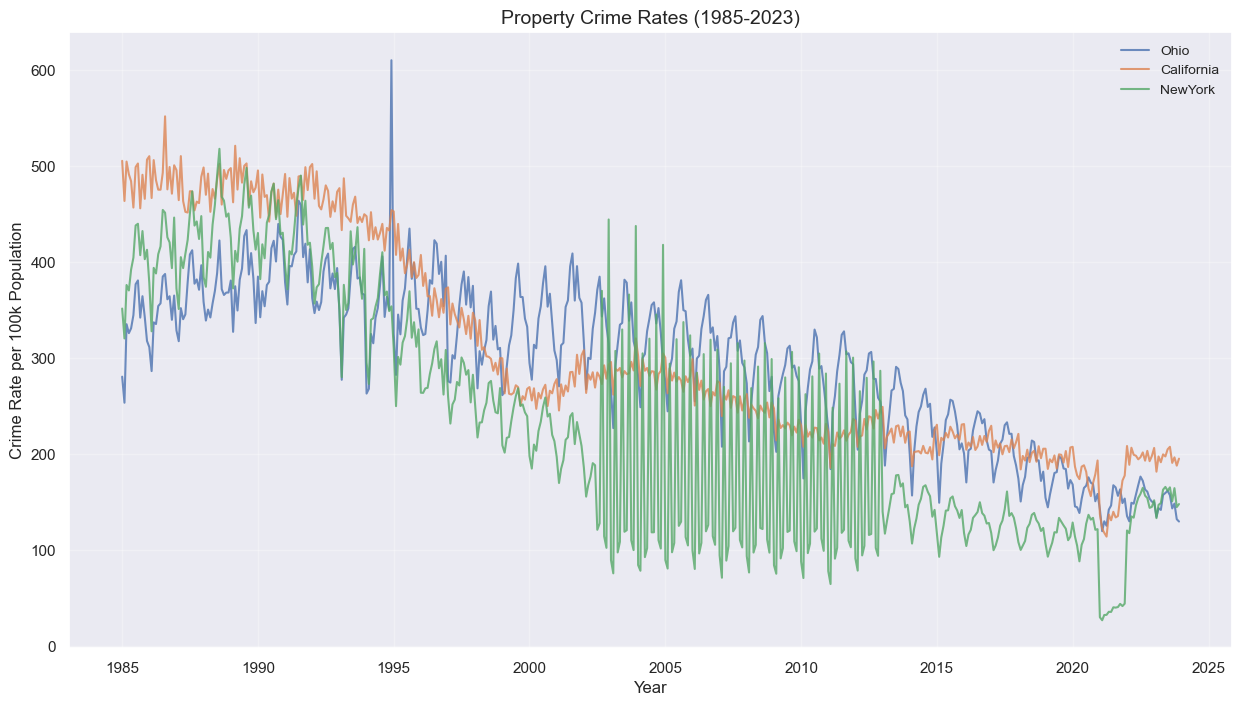

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import and prepare data
df = pd.read_csv('cleaned_combined_state_crime_rates_no_dupes.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter for our three states
states_of_interest = ['Ohio', 'California', 'NewYork']
df_filtered = df[df['state'].isin(states_of_interest)].copy()

# 1. Overall Trends Plot
plt.figure(figsize=(15, 8))
for state in states_of_interest:
    state_data = df_filtered[df_filtered['state'] == state]
    plt.plot(state_data['date'], state_data['crime_rate'], label=state, alpha=0.8)

plt.title('Property Crime Rates (1985-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Rate per 100k Population', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# 2. Statistical Summary
print("\n=== Statistical Summary by State ===")
stats = df_filtered.groupby('state')['crime_rate'].describe()
print(stats.round(2))

# 3. Create yearly averages for trend analysis
df_filtered['year'] = df_filtered['date'].dt.year
yearly_avg = df_filtered.groupby(['state', 'year'])['crime_rate'].mean().reset_index()

# Calculate percent change from 1985 to 2023
change_analysis = yearly_avg.pivot(index='year', columns='state', values='crime_rate')
total_change = ((change_analysis.iloc[-1] - change_analysis.iloc[0]) / change_analysis.iloc[0] * 100).round(2)
print("\n=== Total Percentage Change (1985-2023) ===")
print(total_change)


=== Statistical Summary by State ===
            count    mean     std     min     25%     50%     75%     max
state                                                                    
California  468.0  306.36  110.30  114.27  217.36  268.10  431.28  552.10
NewYork     468.0  235.22  128.10   27.14  120.89  212.19  350.43  518.26
Ohio        468.0  295.00   82.13  119.93  234.90  309.74  357.44  610.53

=== Total Percentage Change (1985-2023) ===
state
California   -59.52
NewYork      -61.11
Ohio         -55.93
dtype: float64


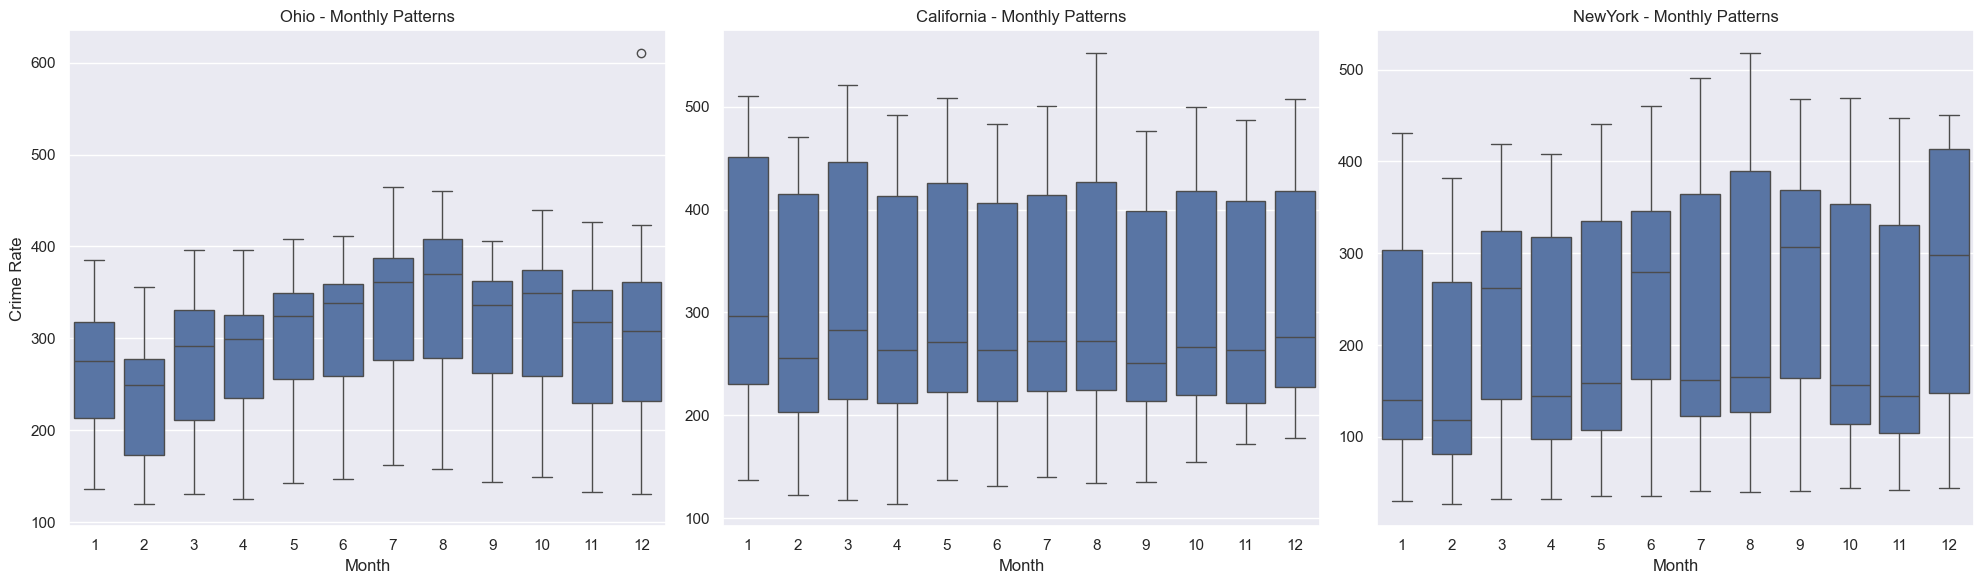

In [17]:
# 4. Seasonal Patterns
df_filtered['month'] = df_filtered['date'].dt.month

plt.figure(figsize=(20, 6))
for idx, state in enumerate(states_of_interest):
    plt.subplot(1, 3, idx+1)
    state_data = df_filtered[df_filtered['state'] == state]
    sns.boxplot(data=state_data, x='month', y='crime_rate')
    plt.title(f'{state} - Monthly Patterns')
    plt.xlabel('Month')
    plt.ylabel('Crime Rate' if idx == 0 else '')
plt.tight_layout()
plt.show()

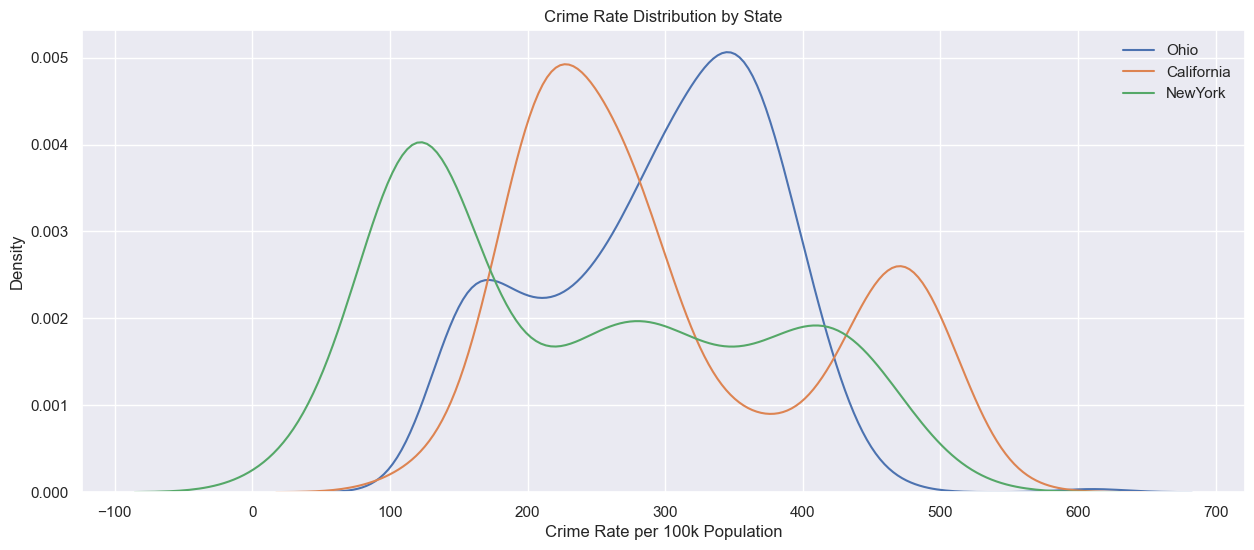

In [18]:
# 5. Distribution Comparison
plt.figure(figsize=(15, 6))
for state in states_of_interest:
    state_data = df_filtered[df_filtered['state'] == state]
    sns.kdeplot(data=state_data, x='crime_rate', label=state)
plt.title('Crime Rate Distribution by State')
plt.xlabel('Crime Rate per 100k Population')
plt.ylabel('Density')
plt.legend()
plt.show()